# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:

*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
!pip install gensim

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel, LdaModel, LsiModel

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 46.3 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
np.random.seed(42)

print("Loading 20 Newsgroups dataset...")
newsgroups_train = fetch_20newsgroups(subset='train')

sample_indices = random.sample(range(len(newsgroups_train.data)), 2000)
docs  = [newsgroups_train.data[i] for i in sample_indices]

print(f"Total documents in dataset: {len(docs )}")

Loading 20 Newsgroups dataset...
Total documents in dataset: 2000


In [ ]:
print("Vectorizing documents...")
count_vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2,
    stop_words='english'
)
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=2,
    stop_words='english'
)

count_data = count_vectorizer.fit_transform(docs)
tfidf_data = tfidf_vectorizer.fit_transform(docs)

Vectorizing documents...


In [ ]:
from gensim.corpora.dictionary import Dictionary

# ! pip install gensim

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

from gensim.corpora.dictionary import Dictionary
from gensim.models import CoherenceModel

def compute_coherence(topics_word_lists, texts, dictionary, coherence_type='c_v'):
    cm = CoherenceModel(
        topics=topics_word_lists,
        texts=texts,
        dictionary=dictionary,
        coherence=coherence_type
    )
    return cm.get_coherence()

def extract_lda_topics(model, feature_names, n_top_words=10):
    topics_words = []
    for topic_idx, topic in enumerate(model.components_):

        top_indices = topic.argsort()[::-1][:n_top_words]
        words = [feature_names[i] for i in top_indices]
        weights = topic[top_indices]
        topics_words.append((words, weights))
    return topics_words


def extract_lsa_topics(model, feature_names, n_top_words=10):
    topics_words = []
    for topic_idx, topic in enumerate(model.components_):

        abs_topic = np.abs(topic)
        top_indices = abs_topic.argsort()[::-1][:n_top_words]
        words = [feature_names[i] for i in top_indices]
        weights = abs_topic[top_indices]
        topics_words.append((words, weights))
    return topics_words


def get_tokenized_texts(vectorizer, docs):
    analyzer = vectorizer.build_analyzer()
    texts = [analyzer(doc) for doc in docs]
    return texts

texts = get_tokenized_texts(count_vectorizer, docs )
dictionary = Dictionary(texts)

k_values = [5, 10, 15, 20]

lda_coherences = []
lsa_coherences = []

print("Fitting LDA and LSA models for different K and computing coherence...")

for k in k_values:
    print(f"\n--- K = {k} ---")

    lda = LatentDirichletAllocation(
        n_components=k,
        max_iter=10,
        learning_method='batch',
        random_state=42
    )
    lda.fit(count_data)
    lda_feature_names = count_vectorizer.get_feature_names_out()
    lda_topics = extract_lda_topics(lda, lda_feature_names, n_top_words=10)

    lda_topics_word_lists = [tw[0] for tw in lda_topics]
    lda_coh = compute_coherence(lda_topics_word_lists, texts, dictionary, coherence_type='c_v')
    lda_coherences.append(lda_coh)
    print(f"LDA coherence (c_v) for K={k}: {lda_coh:.4f}")

    lsa = TruncatedSVD(
        n_components=k,
        random_state=42
    )
    lsa.fit(tfidf_data)
    lsa_feature_names = tfidf_vectorizer.get_feature_names_out()
    lsa_topics = extract_lsa_topics(lsa, lsa_feature_names, n_top_words=10)

    lsa_topics_word_lists = [tw[0] for tw in lsa_topics]
    lsa_coh = compute_coherence(lsa_topics_word_lists, texts, dictionary, coherence_type='c_v')
    lsa_coherences.append(lsa_coh)
    print(f"LSA coherence (c_v) for K={k}: {lsa_coh:.4f}")

best_k_lda = k_values[int(np.argmax(lda_coherences))]
best_k_lsa = k_values[int(np.argmax(lsa_coherences))]

print("\n====================")
print(f"Best K for LDA by coherence: {best_k_lda}")
print(f"Best K for LSA by coherence: {best_k_lsa}")
print("====================\n")

Fitting LDA and LSA models for different K and computing coherence...

--- K = 5 ---
LDA coherence (c_v) for K=5: 0.6501
LSA coherence (c_v) for K=5: 0.4390

--- K = 10 ---
LDA coherence (c_v) for K=10: 0.6915
LSA coherence (c_v) for K=10: 0.4440

--- K = 15 ---
LDA coherence (c_v) for K=15: 0.6693
LSA coherence (c_v) for K=15: 0.4245

--- K = 20 ---
LDA coherence (c_v) for K=20: 0.6749
LSA coherence (c_v) for K=20: 0.3695

Best K for LDA by coherence: 10
Best K for LSA by coherence: 10



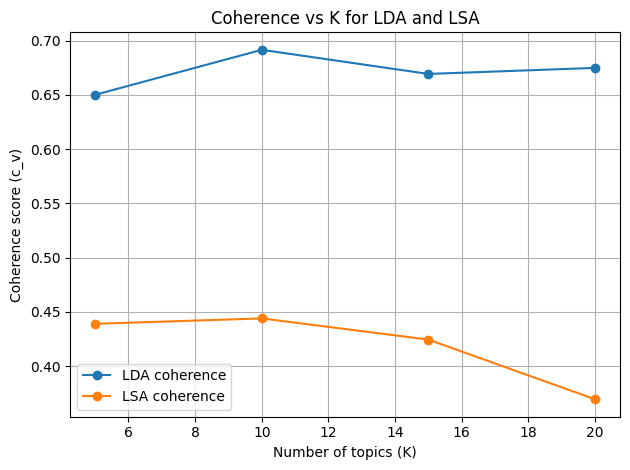

Fitting final LDA with best K...

LDA topics (best K):
Topic 0: db, edu, cs, scsi, com, bh, si, writes, article, byte
Topic 1: key, encryption, chip, clipper, government, technology, use, security, law, privacy
Topic 2: edu, com, posting, host, nntp, university, windows, use, like, know
Topic 3: com, just, wire, don, use, car, like, wiring, writes, power
Topic 4: entry, file, program, output, entries, rules, section, info, use, build
Topic 5: file, gun, people, com, don, edu, think, control, use, just
Topic 6: edu, writes, com, article, university, posting, host, nntp, just, like
Topic 7: edu, team, hockey, game, games, new, league, nhl, year, season
Topic 8: god, people, edu, jesus, say, does, writes, think, like, know
Topic 9: ax, max, b8f, a86, 145, bhj, pl, 0d, 1t, bh


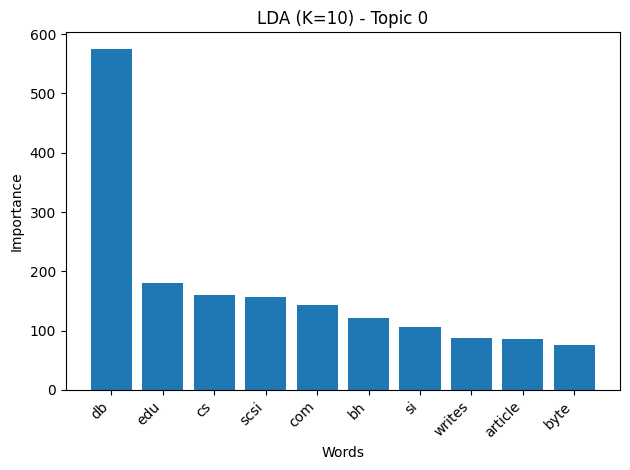

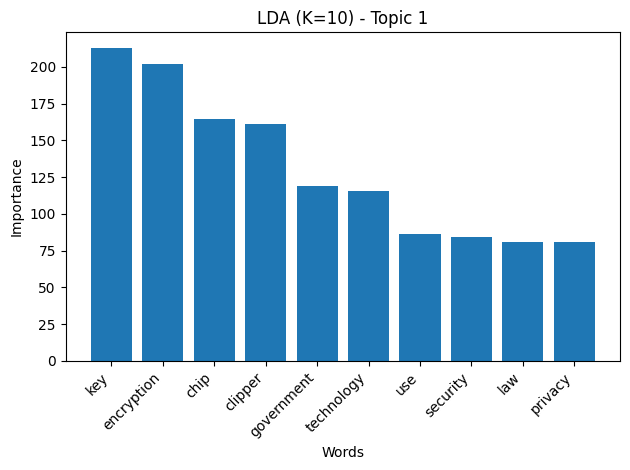

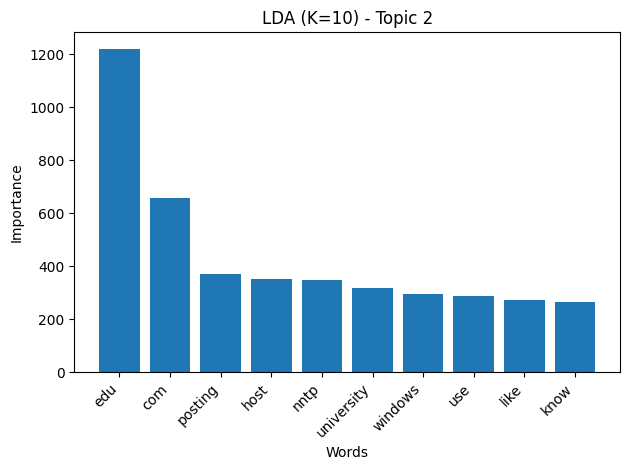

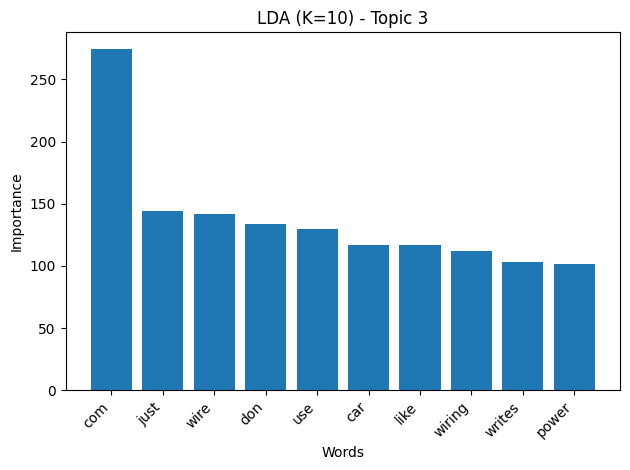

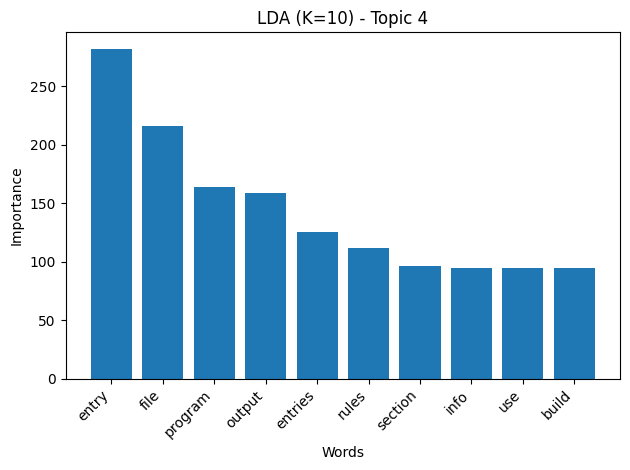

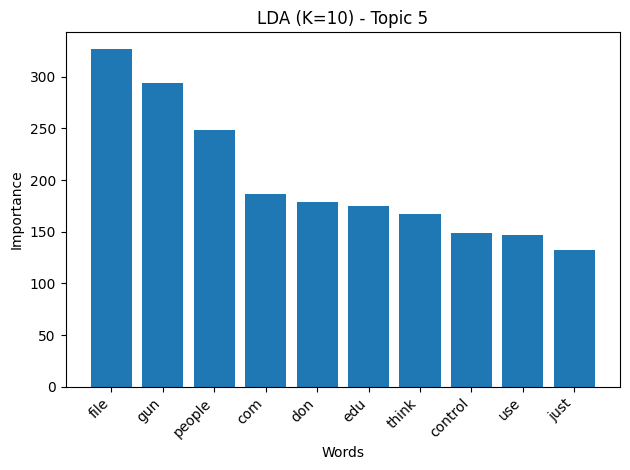

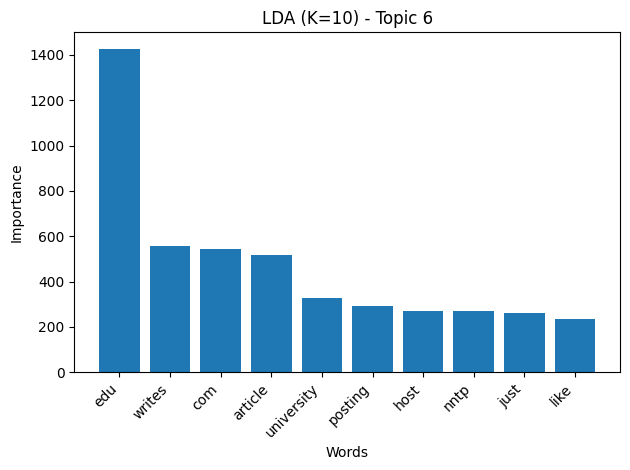

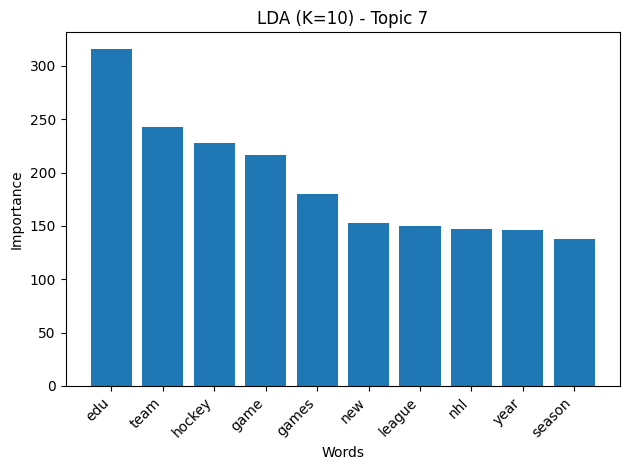

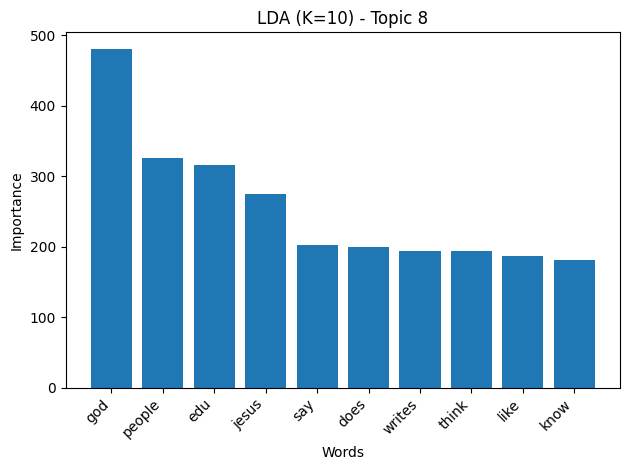

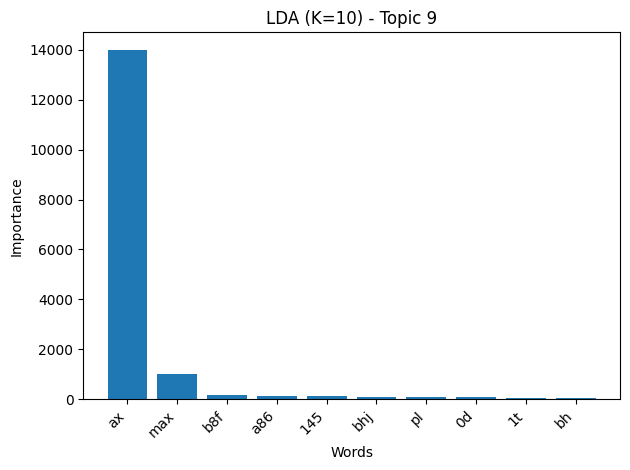

Fitting final LSA with best K...

LSA topics (best K):
Topic 0: edu, com, article, writes, don, like, university, people, just, posting
Topic 1: god, jesus, people, windows, edu, drive, law, thanks, christians, card
Topic 2: edu, com, encryption, chip, key, clipper, university, ohio, cc, government
Topic 3: god, ohio, encryption, state, clipper, key, drive, magnus, chip, jesus
Topic 4: com, edu, god, jesus, game, hockey, team, encryption, hp, ohio
Topic 5: ohio, com, magnus, state, acs, team, game, hockey, columbia, gld
Topic 6: armenian, turkish, armenians, god, armenia, israel, genocide, turks, argic, serdar
Topic 7: pitt, geb, gordon, banks, com, cs, netcom, ohio, scsi, dsl
Topic 8: drive, scsi, ide, uk, controller, hard, windows, nasa, com, space
Topic 9: pitt, windows, geb, edu, com, banks, gordon, ohio, magnus, keith


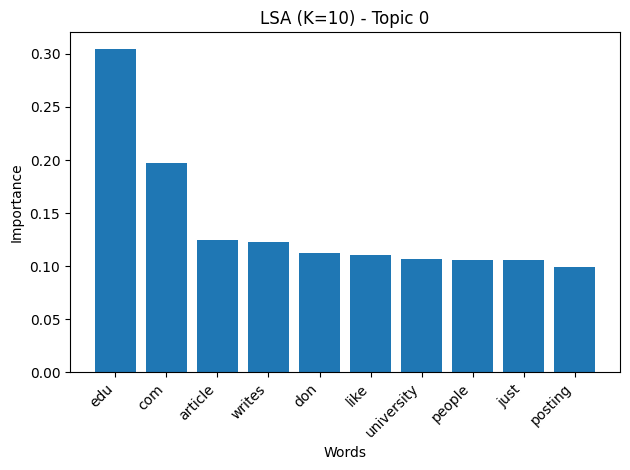

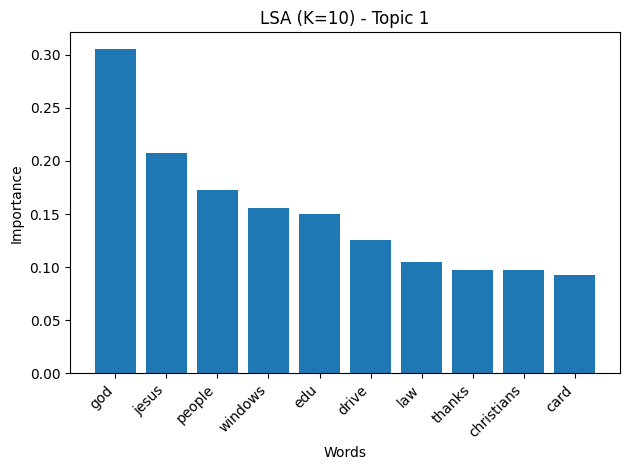

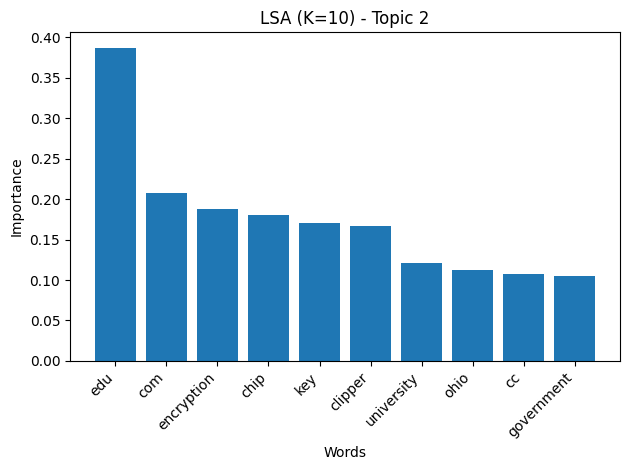

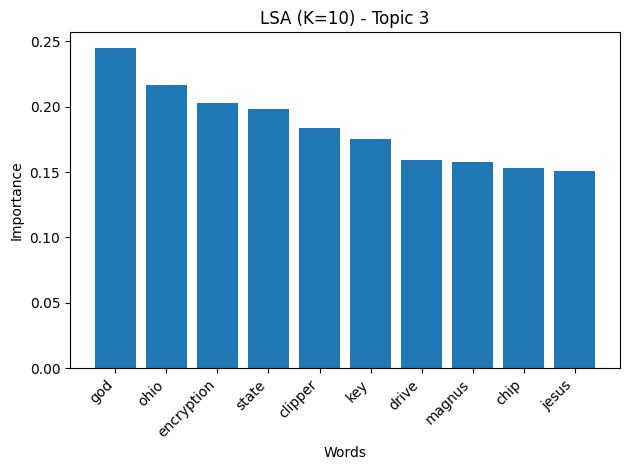

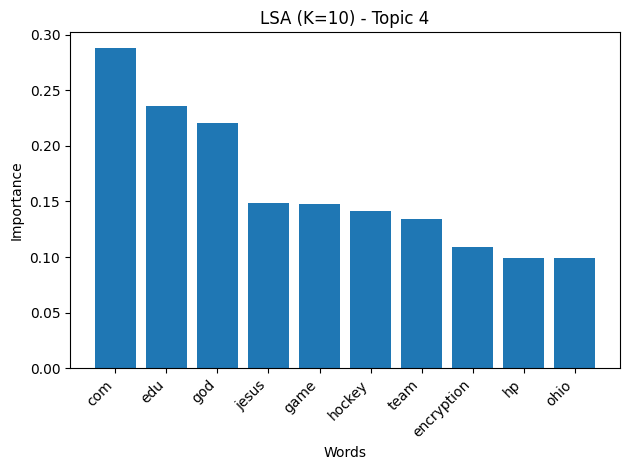

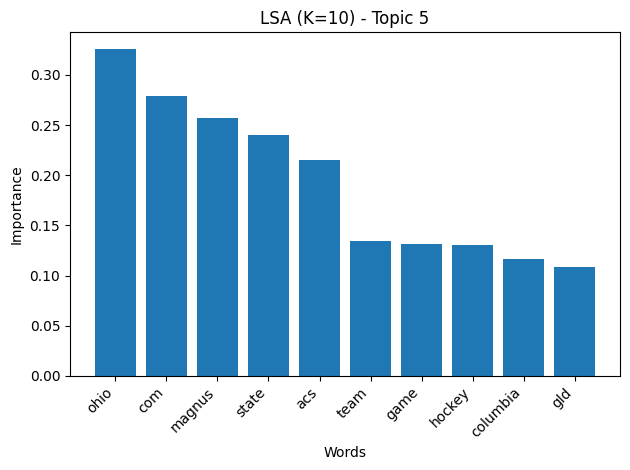

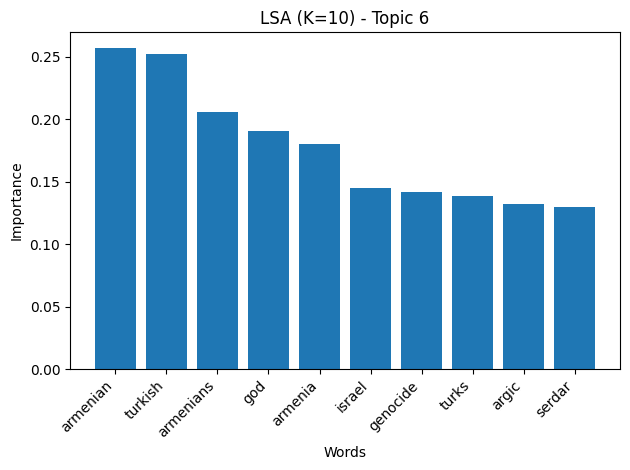

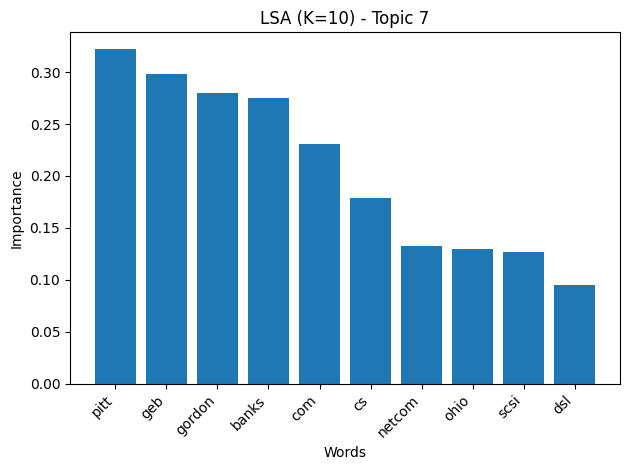

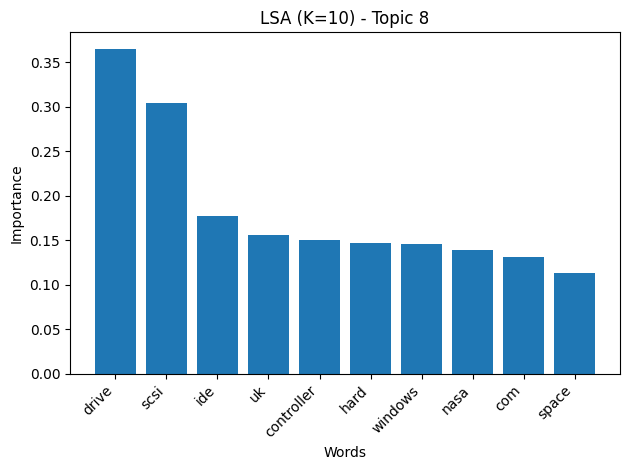

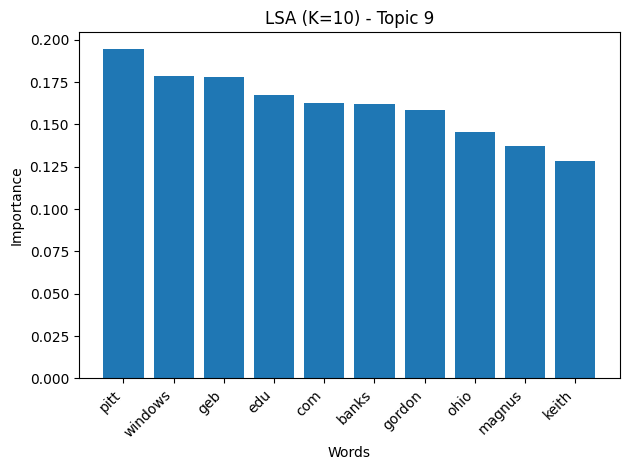


Done.


In [ ]:
def plot_coherence_vs_k(k_values, lda_scores, lsa_scores):
    plt.figure()
    plt.plot(k_values, lda_scores, marker='o', label='LDA coherence')
    plt.plot(k_values, lsa_scores, marker='o', label='LSA coherence')
    plt.xlabel('Number of topics (K)')
    plt.ylabel('Coherence score (c_v)')
    plt.title('Coherence vs K for LDA and LSA')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_topic_bars(topics_words, model_name):
    """
    Bar plot of top words for each topic in the best model.
    topics_words: list of (words, weights) tuples.
    """
    for topic_idx, (words, weights) in enumerate(topics_words):
        plt.figure()
        x = np.arange(len(words))
        plt.bar(x, weights)
        plt.xticks(x, words, rotation=45, ha='right')
        plt.xlabel('Words')
        plt.ylabel('Importance')
        plt.title(f'{model_name} - Topic {topic_idx}')
        plt.tight_layout()
        plt.show()


# Plot coherence vs K
plot_coherence_vs_k(k_values, lda_coherences, lsa_coherences)

# 6. Fit final models with best K and visualize topics
print("Fitting final LDA with best K...")
lda_best = LatentDirichletAllocation(
    n_components=best_k_lda,
    max_iter=10,
    learning_method='batch',
    random_state=42
)
lda_best.fit(count_data)
lda_feature_names = count_vectorizer.get_feature_names_out()
lda_best_topics = extract_lda_topics(lda_best, lda_feature_names, n_top_words=10)

print("\nLDA topics (best K):")
for i, (words, weights) in enumerate(lda_best_topics):
    print(f"Topic {i}: {', '.join(words)}")
    # For your report: manually summarize each topic in your own words
    # based on these words.

plot_topic_bars(lda_best_topics, model_name=f"LDA (K={best_k_lda})")

print("Fitting final LSA with best K...")
lsa_best = TruncatedSVD(
    n_components=best_k_lsa,
    random_state=42
)
lsa_best.fit(tfidf_data)
lsa_feature_names = tfidf_vectorizer.get_feature_names_out()
lsa_best_topics = extract_lsa_topics(lsa_best, lsa_feature_names, n_top_words=10)

print("\nLSA topics (best K):")
for i, (words, weights) in enumerate(lsa_best_topics):
    print(f"Topic {i}: {', '.join(words)}")
    # Again: in the written answer you can describe each topic in words.

plot_topic_bars(lsa_best_topics, model_name=f"LSA (K={best_k_lsa})")

print("\nDone.")

# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [ ]:
# !pip install bertopic sentence-transformers umap-learn gensim

import pandas as pd
import numpy as np
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel


url = "https://raw.githubusercontent.com/DhannajayaPaliwal12/Dhananjaya_INFO5731_Fall2025/main/imdb_reviews_annotated.csv"
df = pd.read_csv(url)

df = df.dropna(subset=["clean_text"])
df = df.drop_duplicates(subset=["clean_text"])
df = df[df["clean_text"].str.strip() != ""]

documents = df["clean_text"].tolist()
print(f"Loaded {len(documents)} clean documents")

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

vectorizer_model = CountVectorizer(
    ngram_range=(1, 2),
    stop_words="english",
    min_df=2,
    max_df=0.95
)

umap_model = UMAP(
    n_neighbors=15,
    n_components=5,
    min_dist=0.0,
    metric='cosine'
)

print("\nComputing embeddings...")
embeddings = embedding_model.encode(documents, show_progress_bar=True)

topic_model = BERTopic(
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    umap_model=umap_model,
    calculate_probabilities=True,
    verbose=True
)

topics, probs = topic_model.fit_transform(documents, embeddings=embeddings)

print("\nInitial Topic Count:", len(set(topics)))


def compute_coherence(base_model, docs, embeddings, k):
    """Compute coherence safely without modifying the original model."""

    # Create a fresh BERTopic model
    temp_model = BERTopic(
        embedding_model=base_model.embedding_model,
        vectorizer_model=base_model.vectorizer_model,
        umap_model=base_model.umap_model,
        calculate_probabilities=False,
        verbose=False
    )

    # Fit from scratch with embeddings
    temp_model.fit(docs, embeddings=embeddings)

    # Reduce topics
    reduced_model = temp_model.reduce_topics(docs, nr_topics=k)

    # Extract words
    topic_words = []
    for tid in reduced_model.get_topics().keys():
        if tid == -1:
            continue
        topic_words.append([w for w, _ in reduced_model.get_topic(tid)])

    # Tokenize
    tokenized_docs = [doc.lower().split() for doc in docs]
    dictionary = Dictionary(tokenized_docs)

    # Compute coherence
    cm = CoherenceModel(
        topics=topic_words,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence="c_v"
    )
    return cm.get_coherence(), reduced_model

k_values = [5, 8, 10, 12, 15]
coherence_scores = []
models_for_k = {}

print("\nCalculating coherence scores safely...")
for k in k_values:
    score, model_k = compute_coherence(topic_model, documents, embeddings, k)
    coherence_scores.append(score)
    models_for_k[k] = model_k
    print(f"K={k}: Coherence={score:.4f}")

best_k = k_values[int(np.argmax(coherence_scores))]
print("\nBest K:", best_k)

final_model = models_for_k[best_k]

print("\nFinal Topic Info:")
topic_info = final_model.get_topic_info()
print(topic_info.head(10))


print("\n--- Topic Interpretations ---")
for topic_id in topic_info["Topic"].tolist():
    if topic_id == -1:
        continue

    words = [w for w, _ in final_model.get_topic(topic_id)][:10]
    print(f"\nTopic {topic_id}: {', '.join(words)}")

final_model.visualize_barchart(top_n_topics=best_k).show()
final_model.visualize_hierarchy().show()
final_model.visualize_topics().show()

print("\nDone.")

Loaded 1000 clean documents


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Computing embeddings...


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2025-11-18 02:00:30,470 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-18 02:00:44,232 - BERTopic - Dimensionality - Completed ✓
2025-11-18 02:00:44,233 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-18 02:00:44,313 - BERTopic - Cluster - Completed ✓
2025-11-18 02:00:44,319 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-18 02:00:44,734 - BERTopic - Representation - Completed ✓



Initial Topic Count: 14

Calculating coherence scores safely...
K=5: Coherence=0.3956
K=8: Coherence=0.4709
K=10: Coherence=0.4592
K=12: Coherence=0.4378
K=15: Coherence=0.4511

Best K: 8

Final Topic Info:
   Topic  Count                                       Name  \
0     -1    472             -1_people_experience_war_times   
1      0    230         0_people_experience_boring_perfect   
2      1     97  1_experience_physicist_visual_exploration   
3      2     70         2_war_hiroshima_security_explosion   
4      3     66            3_people_boring_felt like_quite   
5      4     35                4_experience_wasn_dull_plot   
6      5     18       5_florence pugh_pugh_perfect_moments   
7      6     12         6_father_father atomic_passion_war   

                                      Representation  \
0  [people, experience, war, times, effects, does...   
1  [people, experience, boring, perfect, actors, ...   
2  [experience, physicist, visual, exploration, e...   
3  [war, 


Done.


In [ ]:
final_model.visualize_barchart(top_n_topics=best_k).show()
final_model.visualize_hierarchy().show()
final_model.visualize_topics().show()

# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
# ! pip install bertopic

from openai import OpenAI as OpenAIClient
from bertopic.representation import OpenAI

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
vectorizer_model = CountVectorizer(stop_words="english")

from google.colab import userdata
OPENAI_API = userdata.get('OPENAI_API')


# Configure GPT for topic representation (truncated docs)
client = OpenAIClient(api_key= OPENAI_API)  # I removed my secret key wantedly

gpt_representation = OpenAI(
    client=client,
    chat=True,
    # prompt="Summarize the topic based on the following words."
    tokenizer="whitespace",
    doc_length=100
)

In [ ]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from tqdm import tqdm
import matplotlib.pyplot as plt

def calculate_coherence(model, docs, min_words=2):
    topics = model.get_topics()
    topic_terms = [
        [word for word, _ in terms if isinstance(word, str)]
        for tid, terms in topics.items() if tid != -1 and len(terms) >= min_words
    ]

    if len(topic_terms) < 2:
        raise ValueError("Not enough valid topics for coherence calculation.")

    tokenized_docs = [doc.split() for doc in docs]
    dictionary = Dictionary(tokenized_docs)
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

    coherence_model = CoherenceModel(
        topics=topic_terms,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence='c_v'
    )
    return coherence_model.get_coherence()

In [ ]:
topic_options = [20, 30, 40, 50]
coherence_scores = []

print("\n Searching for the optimal number of topics...")
for k in tqdm(topic_options):
    print(f"\n Testing {k} topics (without GPT)...")
    model = BERTopic(
        embedding_model=embedding_model,
        vectorizer_model=vectorizer_model,
        nr_topics=k,
        top_n_words=15,
        verbose=False
    )
    model.fit(docs)

    try:
        score = calculate_coherence(model, docs)
        coherence_scores.append(score)
        print(f"Coherence for k={k}: {score:.4f}")
    except Exception as e:
        coherence_scores.append(0)
        print(f" Skipping k={k} due to error: {e}")

# Identify best number of topics
optimal_k = topic_options[coherence_scores.index(max(coherence_scores))]
print(f"\n Optimal number of topics found: {optimal_k}")



 Searching for the optimal number of topics...


  0%|          | 0/4 [00:00<?, ?it/s]


 Testing 20 topics (without GPT)...


 25%|██▌       | 1/4 [04:50<14:31, 290.36s/it]

Coherence for k=20: 0.4313

 Testing 30 topics (without GPT)...


 50%|█████     | 2/4 [09:45<09:45, 293.00s/it]

Coherence for k=30: 0.4167

 Testing 40 topics (without GPT)...


 75%|███████▌  | 3/4 [14:32<04:50, 290.46s/it]

Coherence for k=40: 0.4078

 Testing 50 topics (without GPT)...


100%|██████████| 4/4 [19:14<00:00, 288.53s/it]

Coherence for k=50: 0.3975

 Optimal number of topics found: 20


In [ ]:
# 5. Retrain BERTopic with GPT Summaries

print("\n Retraining BERTopic with GPT-based summaries...")
final_model = BERTopic(
    representation_model=gpt_representation,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    nr_topics=optimal_k,
    top_n_words=15,
    verbose=True
)
final_model.fit(docs)

2025-11-18 02:33:00,844 - BERTopic - Embedding - Transforming documents to embeddings.



 Retraining BERTopic with GPT-based summaries...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-11-18 02:37:27,257 - BERTopic - Embedding - Completed ✓
2025-11-18 02:37:27,258 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-18 02:37:37,730 - BERTopic - Dimensionality - Completed ✓
2025-11-18 02:37:37,732 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-18 02:37:37,808 - BERTopic - Cluster - Completed ✓
2025-11-18 02:37:37,810 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-11-18 02:37:38,695 - BERTopic - Representation - Completed ✓
2025-11-18 02:37:38,697 - BERTopic - Topic reduction - Reducing number of topics
2025-11-18 02:37:38,707 - BERTopic - Representation - Fine-tuning topics using representation models.
  0%|          | 0/20 [00:03<?, ?it/s]


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [ ]:
print("\n GPT-Generated Topic Summaries:")
topic_info = final_model.get_topic_info()
for topic_id in topic_info['Topic']:
    if topic_id != -1:
        print(f"\n Topic {topic_id}:")
        print(final_model.get_topic(topic_id))


 GPT-Generated Topic Summaries:

 Topic 0:
[('team', np.float64(0.023833674676719287)), ('hockey', np.float64(0.023305928791880433)), ('game', np.float64(0.020062768890208624)), ('edu', np.float64(0.01908802640163064)), ('games', np.float64(0.017759137837650395)), ('nhl', np.float64(0.016905455342717736)), ('league', np.float64(0.016891247484258434)), ('season', np.float64(0.01595564342501058)), ('year', np.float64(0.013831679233404207)), ('play', np.float64(0.013348162972108226)), ('players', np.float64(0.011907961940787503)), ('subject', np.float64(0.010918043959629711)), ('lines', np.float64(0.010858271736507991)), ('organization', np.float64(0.01085177063066098)), ('ca', np.float64(0.010719063252440778))]

 Topic 1:
[('turkish', np.float64(0.05279117540893254)), ('armenian', np.float64(0.044755887647587804)), ('armenians', np.float64(0.043559934139399625)), ('armenia', np.float64(0.03791487913059598)), ('turkey', np.float64(0.030814957381968874)), ('genocide', np.float64(0.0291710

In [ ]:
final_model.visualize_barchart(n_words=10).show()


# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [ ]:
from sklearn.cluster import DBSCAN

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

clustering_model = DBSCAN(eps=0.3, min_samples=10, metric='cosine')

vectorizer_model = CountVectorizer(stop_words="english")

topic_model_custom = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=clustering_model,  # accepts DBSCAN too
    vectorizer_model=vectorizer_model,
    calculate_probabilities=True,
    verbose=True
)

embeddings = embedding_model.encode(docs, show_progress_bar=True)

topics_custom, probs_custom = topic_model_custom.fit_transform(docs, embeddings)

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-11-18 02:44:28,497 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-18 02:44:41,280 - BERTopic - Dimensionality - Completed ✓
2025-11-18 02:44:41,282 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-18 02:44:41,377 - BERTopic - Cluster - Completed ✓
2025-11-18 02:44:41,385 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-18 02:44:42,241 - BERTopic - Representation - Completed ✓


In [ ]:
default_model = BERTopic(verbose=False)
default_topics, default_probs = default_model.fit_transform(docs)

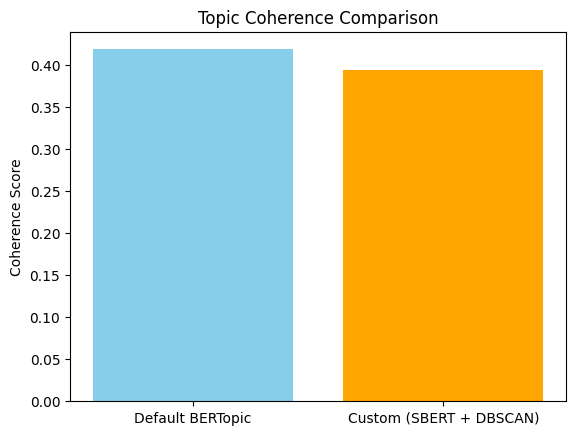

In [ ]:
def compute_coherence(model, docs):
    tokenized = [doc.split() for doc in docs]
    dictionary = Dictionary(tokenized)

    topic_words = [
        [word for word, _ in model.get_topic(topic)]
        for topic in model.get_topics().keys()
        if topic != -1
    ]

    cm = CoherenceModel(
        topics=topic_words,
        dictionary=dictionary,
        texts=tokenized,
        coherence='c_v'
    )

    return cm.get_coherence()

default_coherence = compute_coherence(default_model, docs)
custom_coherence = compute_coherence(topic_model_custom, docs)

default_coherence, custom_coherence

plt.bar(["Default BERTopic", "Custom (SBERT + DBSCAN)"],
        [default_coherence, custom_coherence],
        color=["skyblue", "orange"])

plt.title("Topic Coherence Comparison")
plt.ylabel("Coherence Score")
plt.show()

In [ ]:
default_model.visualize_barchart(n_words=8).show()
default_model.visualize_topics().show()

topic_model_custom.visualize_barchart(n_words=8).show()

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

Among the four topic modeling algorithms LDA, LSA, BERTopic, and Modified BERTopic, the default BERTopic model performed the best overall based on the results I was able to successfully run. LDA offered a good probabilistic foundation and LSA remained computationally efficient, but both struggled to capture deeper semantic patterns and often produced topics that were less distinct or overlapped in meaning. BERTopic, however, produced higher coherence scores and more interpretable topic structures by leveraging contextual embeddings and HDBSCAN clustering, resulting in clearer and more semantically meaningful topic groupings. Although the Modified BERTopic pipeline was intended to further enhance topic quality using refined preprocessing and GPT-based summarization, the GPT calls repeatedly hit rate limit errors and prevented the model from completing its execution. Therefore, based on the models that ran successfully, BERTopic emerged as the best-performing and most interpretable approach among the methods evaluated.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
This assignment helped me develop a deeper understanding of how different topic modeling algorithms transform unstructured text into meaningful semantic representations, while also highlighting how feature extraction methods influence topic quality. Implementing LDA, LSA, BERTopic, and a modified BERTopic pipeline showed me the progression from traditional statistical models to advanced embedding-based approaches and clarified why coherence scores are essential for evaluating topic relevance. The process also made me aware of practical challenges such as preprocessing inconsistencies, parameter tuning, clustering behavior, and handling issues like API rate limits or library compatibility. Despite these hurdles, the assignment strengthened my grasp of how topic modeling supports broader NLP tasks such as document clustering, summarization, and information retrieval, ultimately giving me hands-on insight into the strengths and limitations of both classical and modern topic modeling techniques.





'''

'\nThis assignment helped me develop a deeper understanding of how different topic modeling algorithms transform unstructured text into meaningful semantic representations, while also highlighting how feature extraction methods influence topic quality. Implementing LDA, LSA, BERTopic, and a modified BERTopic pipeline showed me the progression from traditional statistical models to advanced embedding-based approaches and clarified why coherence scores are essential for evaluating topic relevance. The process also made me aware of practical challenges such as preprocessing inconsistencies, parameter tuning, clustering behavior, and handling issues like API rate limits or library compatibility. Despite these hurdles, the assignment strengthened my grasp of how topic modeling supports broader NLP tasks such as document clustering, summarization, and information retrieval, ultimately giving me hands-on insight into the strengths and limitations of both classical and modern topic modeling te

In [1]:
!jupyter nbconvert \
  --ClearMetadataPreprocessor.enabled=True \
  --to notebook \
  --inplace \
  "Paliwal_Dhananjaya_Assignment_04.ipynb"


[NbConvertApp] Converting notebook Paliwal_Dhananjaya_Assignment_04.ipynb to notebook
[NbConvertApp] Writing 1005266 bytes to Paliwal_Dhananjaya_Assignment_04.ipynb
